In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('C:/Users/KIIT/Desktop/High Radius/Final.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# MILESTONE 1

In [3]:
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,20220101,160023,NR04,787347798,"1065,33",20220107,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,20220102,73006,NR03,795887697,"0,00",20211231,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,20220102,110022,NR04,884689948,"302,85",20220106,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,20220102,130024,NR02,814096053,"8380,69",20220106,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,20220102,133014,NR03,901859762,"545,85",20220107,EUR,64.0,1210183107


In [4]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [5]:
df.shape

(1101925, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [7]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [8]:
df=df.fillna('NaN')
df.isnull().sum()

CUSTOMER_ORDER_ID          0
SALES_ORG                  0
DISTRIBUTION_CHANNEL       0
DIVISION                   0
RELEASED_CREDIT_VALUE      0
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
CREDIT_CONTROL_AREA        0
SOLD_TO_PARTY              0
ORDER_AMOUNT               0
REQUESTED_DELIVERY_DATE    0
ORDER_CURRENCY             0
CREDIT_STATUS              0
CUSTOMER_NUMBER            0
dtype: int64

In [9]:
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,20220101,160023,NR04,787347798,"1065,33",20220107,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,20220102,73006,NR03,795887697,"0,00",20211231,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,20220102,110022,NR04,884689948,"302,85",20220106,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,20220102,130024,NR02,814096053,"8380,69",20220106,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,20220102,133014,NR03,901859762,"545,85",20220107,EUR,64.0,1210183107


In [10]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,2022-01-01,160023,NR04,787347798,"1065,33",2022-01-07,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,2022-01-02,73006,NR03,795887697,"0,00",2021-12-31,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,2022-01-02,110022,NR04,884689948,"302,85",2022-01-06,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,"8380,69",2022-01-06,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,2022-01-02,133014,NR03,901859762,"545,85",2022-01-07,EUR,64.0,1210183107


In [11]:
(df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum()

27142

In [12]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
(df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum()

0

In [13]:
df['ORDER_AMOUNT'].str.contains('-').sum()

32

In [14]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(to_replace = '-',value = '',regex=True)
df['ORDER_AMOUNT'].str.contains('-').sum()

0

In [15]:
df['ORDER_AMOUNT'].str.contains(',').sum()

1073406

In [16]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(to_replace = ',',value = '.',regex=True)
df['ORDER_AMOUNT'].str.contains(',').sum()

0

In [17]:
(df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()

100437

In [18]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [19]:
conversion_rates = {
    "EUR": 0.93,
    "AUD": 1.53,
    "CAD": 1.36,
    "GBP": 0.81,
    "MYR": 4.59,
    "PLN": 4.19,
    "AED": 3.67,
    "HKD": 7.83,
    "CHF": 0.91,
    "RON": 4.61,
    "SGD": 1.35,
    "CZK": 22.01,
    "HUF": 346.58,
    "NZD": 1.64,
    "BHD": 0.38,
    "SAR": 3.75,
    "QAR": 3.64,
    "KWD": 0.31,
    "SEK": 10.72
}

df["ORDER_AMOUNT"] = pd.to_numeric(df["ORDER_AMOUNT"], errors="coerce")
df["amount_in_usd"] = df.apply(lambda row: row["ORDER_AMOUNT"] / conversion_rates.get(row["ORDER_CURRENCY"], 1), axis=1)
print(df['amount_in_usd'])

0           1026.462366
1            846.623656
2          72573.612903
3           1511.333333
4              0.000000
               ...     
1101920     3270.511111
1101921        0.000000
1101922        0.000000
1101923        0.000000
1101924     3270.511111
Name: amount_in_usd, Length: 1074783, dtype: float64


In [20]:
zero_values = df[df['amount_in_usd'] == 0]
print(zero_values)

         CUSTOMER_ORDER_ID  SALES_ORG DISTRIBUTION_CHANNEL      DIVISION  \
4                930253442       2381               Greece  South-Region   
57               778638920       2373             Thailand  South-Region   
62               870847173       4352               Poland  North-Region   
67               822817658       2491          Netherlands  North-Region   
117              799548044       2849              Belgium  South-Region   
...                    ...        ...                  ...           ...   
1101891          835314074       3410               Taiwan  South-Region   
1101892          958175613       4452           Mauritania  South-Region   
1101921          998890898       4509              Armenia  South-Region   
1101922          983330221       3951                Nepal  South-Region   
1101923          926668029       3235               Panama  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
4                   

In [21]:
df['unique_cust_id'] = df.apply(lambda x : str(x["CUSTOMER_NUMBER"]) + str(x["COMPANY_CODE"]), axis=1)

In [22]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1026.462366,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,846.623656,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72573.612903,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1511.333333,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


# MILESTONE 2

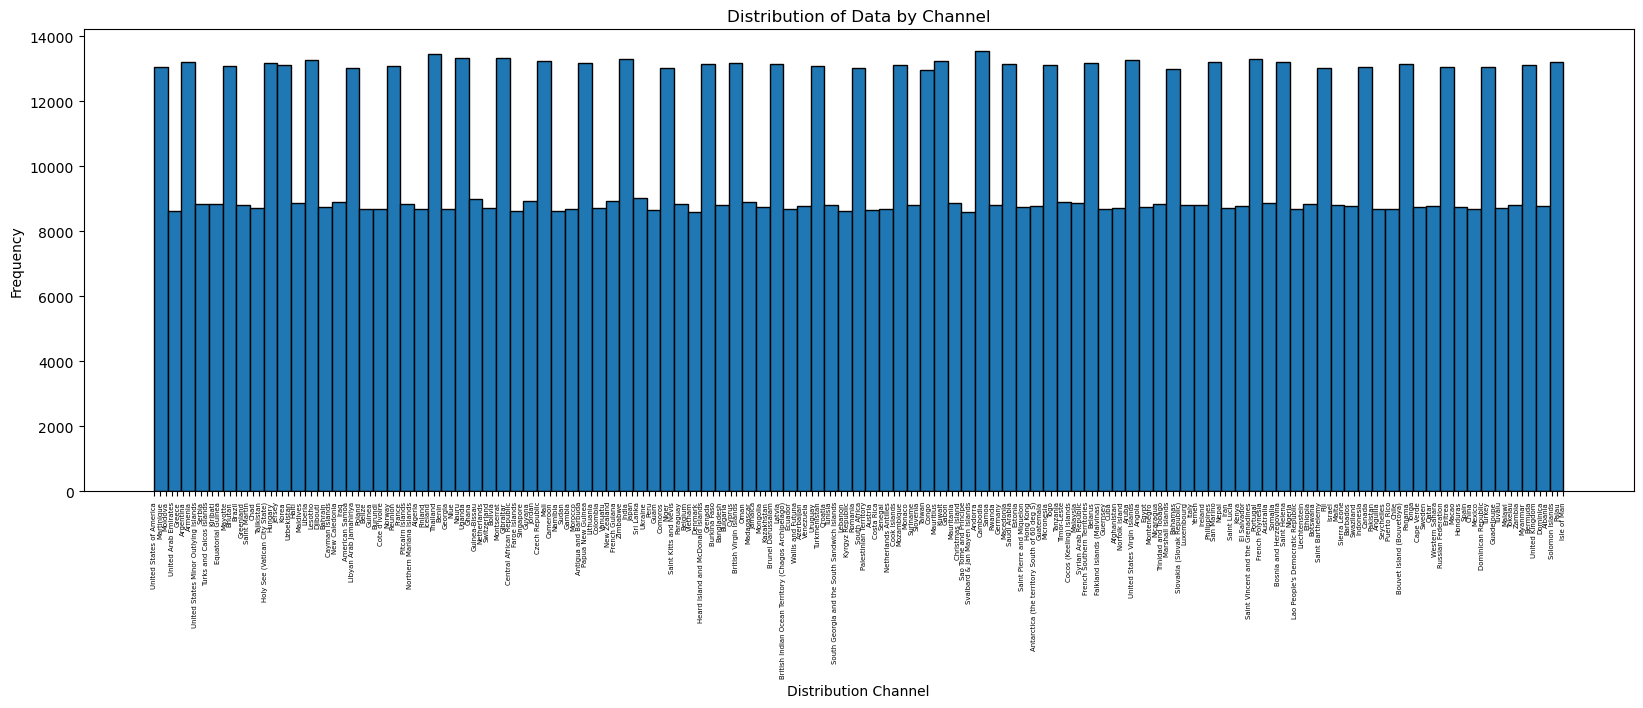

In [23]:
plt.figure(figsize=(20, 6)) 
plt.hist(df['DISTRIBUTION_CHANNEL'], bins='auto', edgecolor="black")
plt.xlabel('Distribution Channel')
plt.xticks(fontsize=5) 
plt.ylabel('Frequency')
plt.title('Distribution of Data by Channel')
plt.xticks(rotation=90)
plt.show()

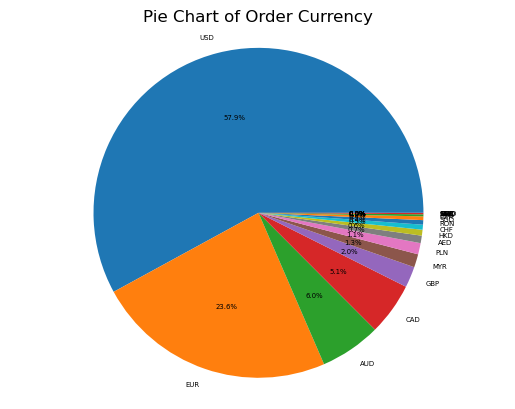

In [24]:
currency_counts = df['ORDER_CURRENCY'].value_counts()
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%',textprops={'fontsize': 5}, radius=30)
plt.yticks(fontsize=5)
plt.title('Pie Chart of Order Currency')
plt.axis('equal')
plt.show()

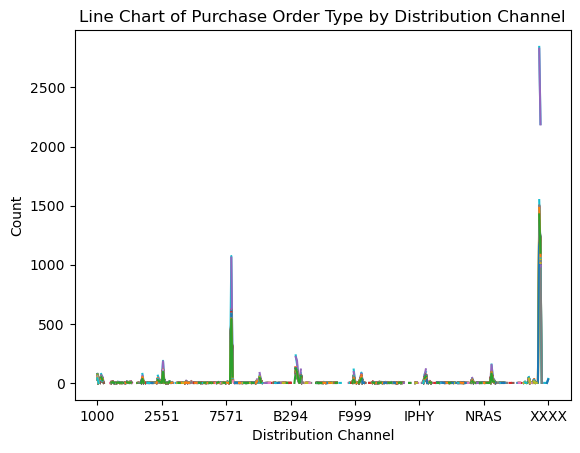

In [25]:
grouped_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size()
reshaped_data = grouped_data.unstack()
reshaped_data.plot(kind='line')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Line Chart of Purchase Order Type by Distribution Channel')
plt.legend().set_visible(False)
plt.show()


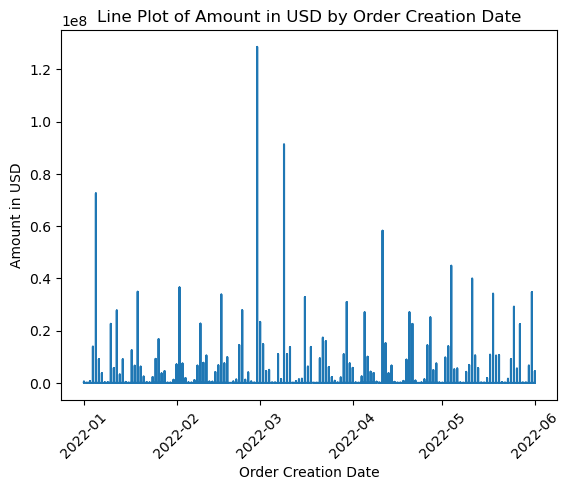

In [26]:
df_sorted = df.sort_values('ORDER_CREATION_DATE')
plt.plot(df_sorted['ORDER_CREATION_DATE'], df_sorted['amount_in_usd'])
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of Amount in USD by Order Creation Date')
plt.xticks(rotation=45)
plt.show()


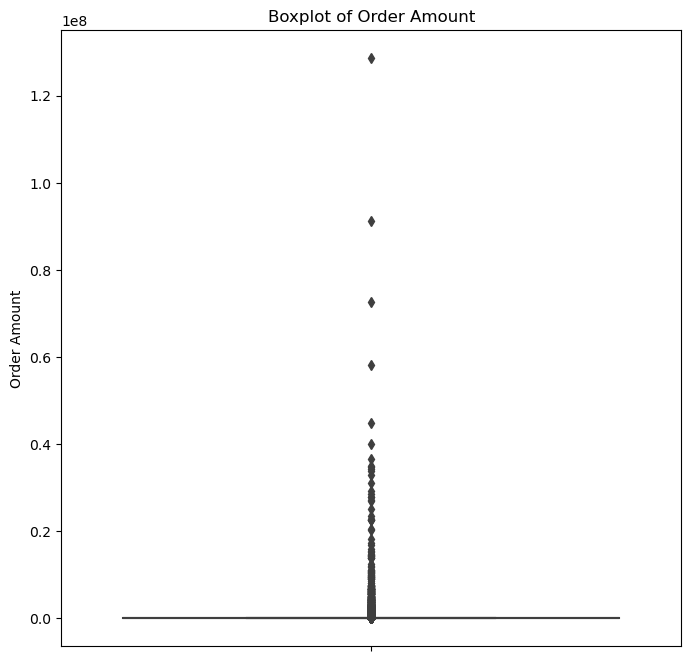

In [27]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, y='ORDER_AMOUNT')
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount')
plt.show()


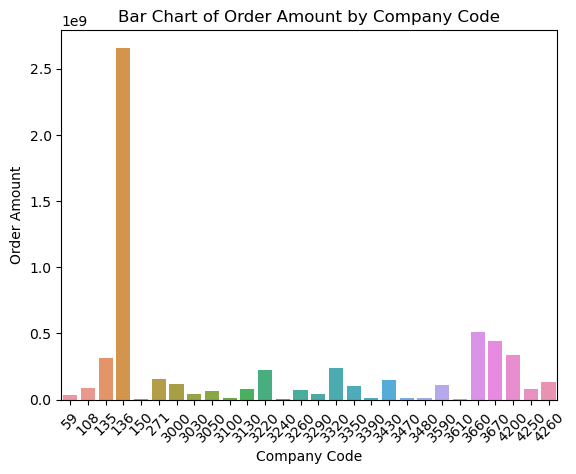

In [28]:
grouped_data = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().reset_index()
sns.barplot(data=grouped_data, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar Chart of Order Amount by Company Code')
plt.xticks(rotation=45)
plt.show()


# MILESTONE 3

<AxesSubplot:xlabel='amount_in_usd'>

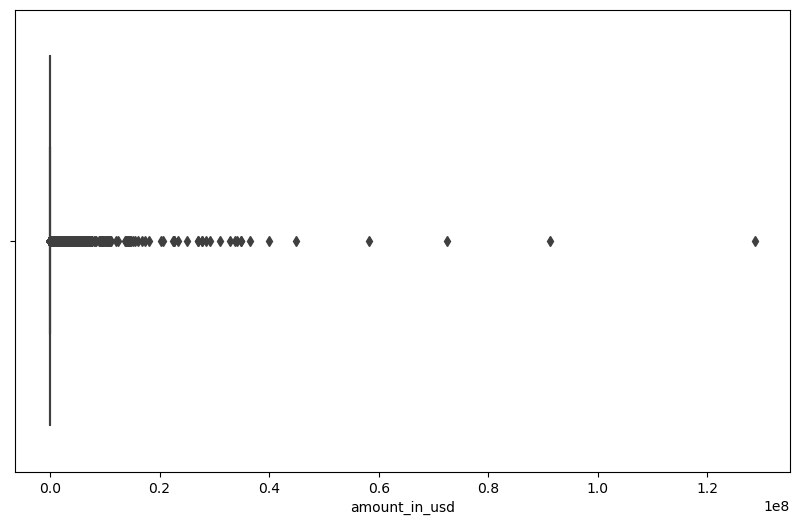

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount_in_usd'])


In [30]:
Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [31]:
print(lower_bound)
print(upper_bound)

-1065.9290322580646
1812.6774193548388


In [32]:
outliers = df[(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)]
pre_outliers = len(outliers)
print("Number of outliers remaining:", pre_outliers)

Number of outliers remaining: 101733


In [33]:
df.loc[df['amount_in_usd'] > upper_bound, 'amount_in_usd'] = upper_bound
df.loc[df['amount_in_usd'] < lower_bound, 'amount_in_usd'] = lower_bound

In [34]:
remaining_outliers = df[(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)]
post_outliers = len(remaining_outliers)
print("Number of outliers remaining:",post_outliers)

Number of outliers remaining: 0


<AxesSubplot:xlabel='amount_in_usd'>

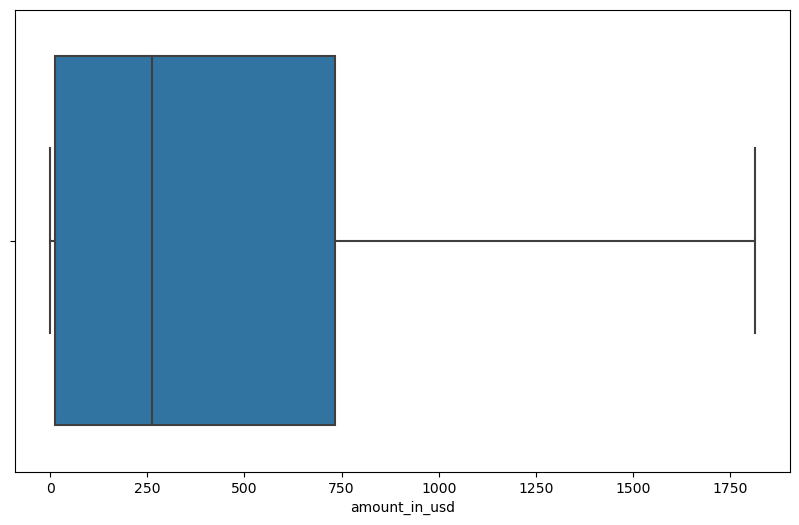

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount_in_usd'])

In [36]:
median = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].mask(df['amount_in_usd'] > 2000000,median)

In [37]:
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)
print(col)

unique_cust_id


In [38]:
categorical = []
continuous = []

unique_threshold = 100  # Define the threshold for the number of unique values

for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values <= unique_threshold:
        categorical.append(col)
    else:
        continuous.append(col)
categorical = []
continuous = []

unique_threshold = 100  # Define the threshold for the number of unique values

for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values <= unique_threshold:
        categorical.append(col)
    else:
        continuous.append(col)

print("Categorical columns:", categorical)
print("Continuous columns:",continuous)
print("Categorical columns:", categorical)
print("Continuous columns:", continuous)


Categorical columns: ['DIVISION', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS']
Continuous columns: ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id']
Categorical columns: ['DIVISION', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS']
Continuous columns: ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id']


In [39]:
categorical_columns = ['DIVISION', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS']
continuous_columns = ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id']

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# # Concatenate the continuous columns with the encoded categorical columns
# df_encoded = pd.concat([df_encoded, df[continuous_columns]], axis=1)

df_encoded.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,...,ORDER_CURRENCY_QAR,ORDER_CURRENCY_RON,ORDER_CURRENCY_SAR,ORDER_CURRENCY_SEK,ORDER_CURRENCY_SGD,ORDER_CURRENCY_USD,CREDIT_STATUS_52.0,CREDIT_STATUS_64.0,CREDIT_STATUS_93.0,CREDIT_STATUS_NaN
0,946851639,3537,United States of America,"0,00",1000,2022-01-01,43012,756141537,954.61,2022-01-13,...,0,0,0,0,0,0,0,0,0,1
1,963432061,3449,Martinique,"0,00",1000,2022-01-01,43114,798847812,787.36,2022-01-11,...,0,0,0,0,0,0,0,0,0,1
2,971991639,3238,Moldova,"82342,02",I200,2022-01-01,110019,960984659,67493.46,2022-01-12,...,0,0,0,0,0,0,0,0,1,0
3,754349803,3911,United Arab Emirates,"1471,24",N000,2022-01-01,153013,925857642,1405.54,2022-01-06,...,0,0,0,0,0,0,0,0,1,0
4,930253442,2381,Greece,"0,00",N000,2022-01-01,160020,947942786,0.00,2022-01-06,...,0,0,0,0,0,0,0,1,0,0


In [40]:
for col in continuous:
    if np.issubdtype(df[col].dtype, np.number):
        df[col] = df[col].apply(lambda x: np.log(x))

In [41]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

In [42]:
grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']
grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,7.649693,NaN,"0,000,000,00139707,530,000,000,000,000,000,000...",141,7.50256
1,7.650169,NaN,"0,000,000,000,001433,480,000,000,000,000,000,0...",129,7.50256
2,7.650645,NaN,"0,000,000,000,000,000,001129,730,00257,730,000...",116,7.50256
3,7.651120,NaN,"0,000,000,000,000,000,000,000,000,000,000,000,...",124,7.50256
4,7.651596,NaN,"0,000,000,000,000,00963,100,000,000,000,00156,...",137,7.50256
...,...,...,...,...,...
2406,8.413165,NaN,"0,000,001205,460,000,000,000,00227,280,000,000...",143,7.50256
2407,8.413387,NaN,"2898,260,000,000,000,000,000,000,000,000,000,0...",122,7.50256
2408,8.413609,NaN,"87582,530,000,00819,290,00674,910,000,000,000,...",139,7.50256
2409,8.413831,NaN,"0,000,000,000,000,000,000,000,000,000,000,000,...",146,7.50256


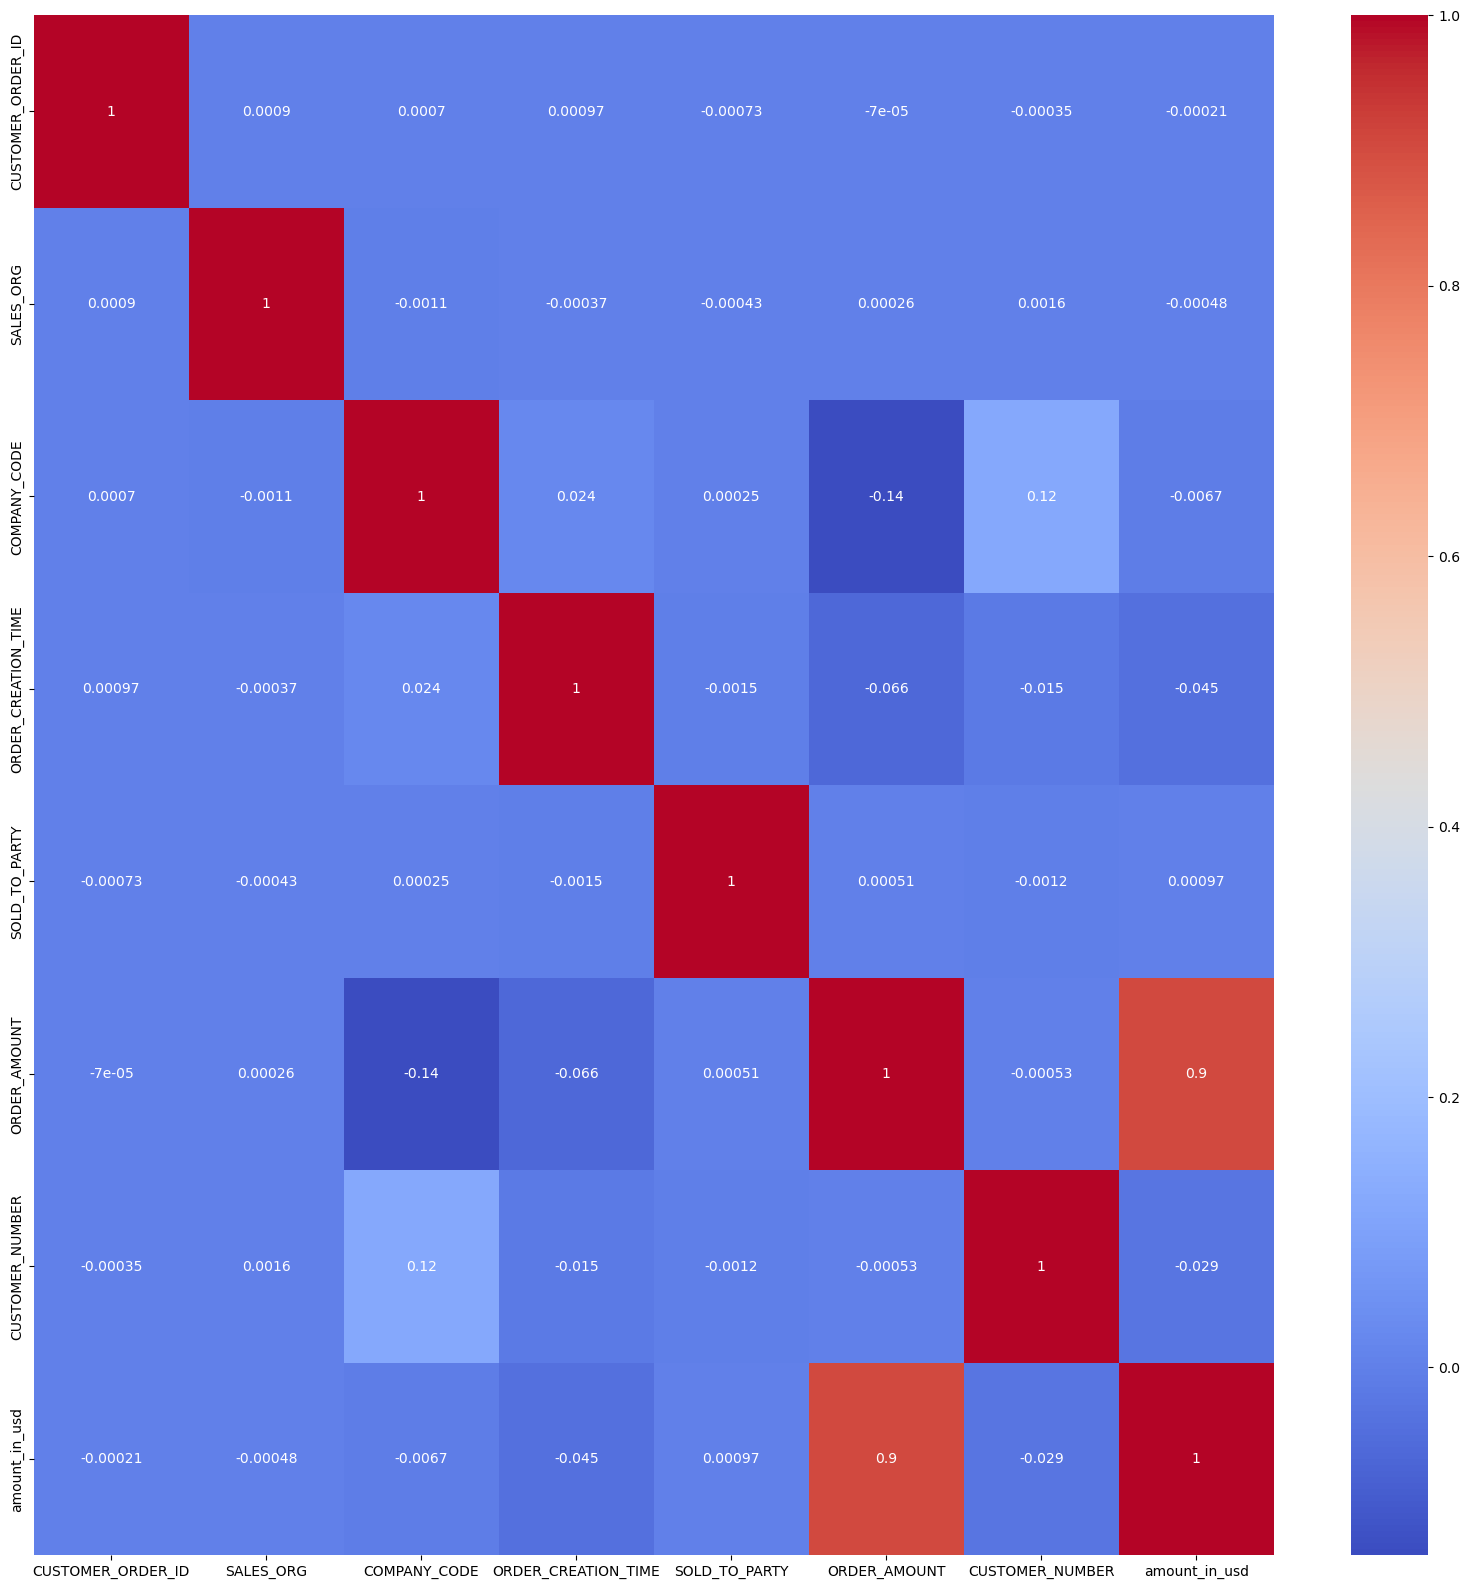

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [44]:
corr_matrix = df.corr()
corr_matrix[corr_matrix['amount_in_usd'] > 0]['amount_in_usd'].sort_values(ascending=False)

amount_in_usd    1.000000
ORDER_AMOUNT     0.902622
SOLD_TO_PARTY    0.000966
Name: amount_in_usd, dtype: float64